<a href="https://colab.research.google.com/github/sahug/python-data-structure/blob/main/14%20Patterns%20to%20Ace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**14 Patterns to Ace**

#**1. Sliding Window**

The Sliding Window pattern is used to perform a required operation on a specific window size of a given array or linked list, such as finding the longest subarray containing all 1s. 

**Sliding Windows start from the 1st element and keep shifting right by one element and adjust the length of the window according to the problem that you are solving.** In some cases, the window size remains constant and in other cases the sizes grows or shrinks.

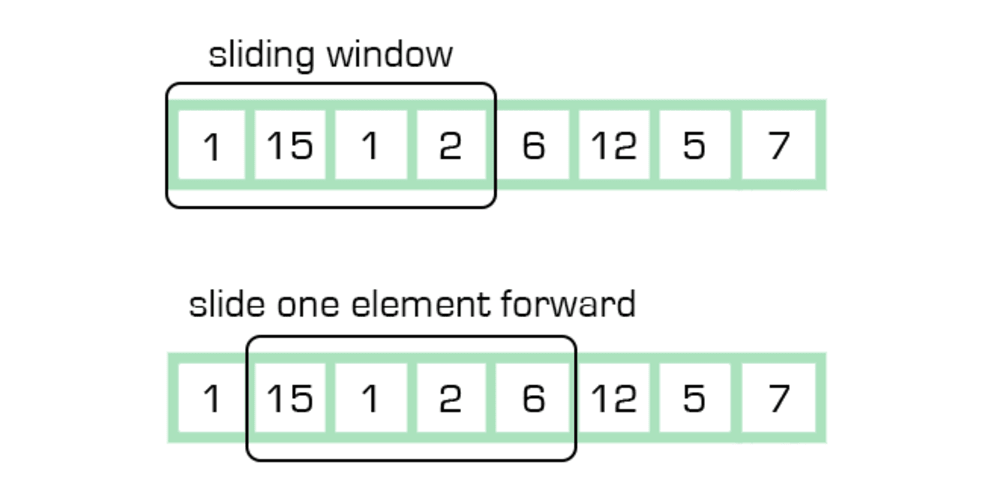

**Following are some ways you can identify that the given problem might require a sliding window:**

- The problem input is a linear data structure such as a linked list, array, or string
- You’re asked to find the longest/shortest substring, subarray, or a desired value

**Common problems you use the sliding window pattern with:**

- Maximum sum subarray of size ‘K’ (easy)
- Longest substring with ‘K’ distinct characters (medium)
- String anagrams (hard)

**Example:** Given an array of integers, our aim is to calculate the maximum sum of "k" consecutive elements in the array.

**Strategy**: 
- First we calculate the sum of all the elements of first window. 
- Next, we keep removing the first element of each window.
- Save the maximum sum of all window

In [1]:
def maxSum(arr, k):  
  max_sum , window_sum = 0, 0
  window_start = 0

  for window_end in range(len(arr)):
    window_sum += arr[window_end]  
   
    if window_end >= k-1:
      max_sum = max(max_sum, window_sum)
      window_sum -= arr[window_start]  
      window_start += 1  
  return max_sum

arr = [1, 4, 2, 10, 23, 3, 1, 0, 20]
k = 4
print(maxSum(arr, k))

arr = [100, 200, 300, 400]
k = 2
print(maxSum(arr, k))

arr = [2, 3]
k = 3
print(maxSum(arr, k))

39
700
0


#**2. Two Pointers or Iterators**

**Two Pointers is a pattern where two pointers iterate through the data structure in tandem until one or both of the pointers hit a certain condition.** Two Pointers is often useful when searching pairs in a sorted array or linked list; for example, when you have to compare each element of an array to its other elements.

Two pointers are needed because with just pointer, you would have to continually loop back through the array to find the answer. This back and forth with a single iterator is inefficient for time and space complexity — a concept referred to as asymptotic analysis. While the brute force or naive solution with 1 pointer would work, it will produce something along the lines of O(n²). In many cases, two pointers can help you find a solution with better space or runtime complexity.

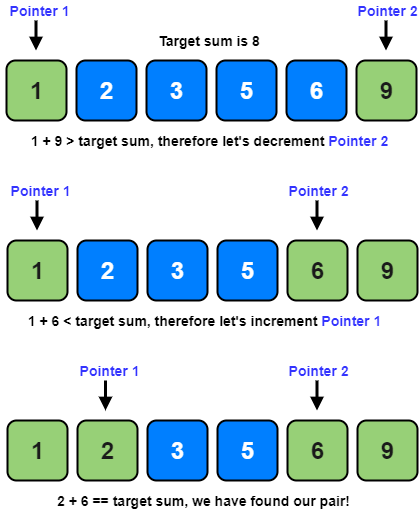

**Ways to identify when to use the Two Pointer method:**
- It will feature problems where you deal with sorted arrays (or Linked Lists) and need to find a set of elements that fulfill certain constraints
- The set of elements in the array is a pair, a triplet, or even a subarray

**Here are some problems that feature the Two Pointer pattern:**
- Squaring a sorted array (easy)
- Triplets that sum to zero (medium)
- Comparing strings that contain backspaces (medium)

**Example**: Given a sorted array A (sorted in ascending order), having N integers, find if there exists any pair of elements (A[i], A[j]) such that their sum is equal to X.

**Startegy**: Start with 2 pointers, start and end of the list. The idea is to get close to the target untill we find the target. Keep moving left and right pointer depending on how far or close we are to the target.

In [2]:
from typing import List
def ispairSum(arr: List[int], target: int) -> List[int]:
  l, r = 0, len(arr) - 1

  while l < r:
    sum = arr[l] + arr[r]
    if sum > target:
      r -= 1
    elif sum < target:
      l += 1
    else:
      return [arr[l], arr[r]]

arr = [10, 20, 35, 50, 75, 80]
target = 70
ispairSum(arr, target)

[20, 50]

#**3. Fast and Slow pointers**

The Fast and Slow pointer approach, also known as the Hare & Tortoise algorithm, is a pointer algorithm that **uses two pointers which move through the array (or sequence/linked list) at different speeds**. This approach is quite useful when dealing with cyclic linked lists or arrays.

By moving at different speeds (say, in a cyclic linked list), the algorithm proves that the two pointers are bound to meet. The fast pointer should catch the slow pointer once both the pointers are in a cyclic loop.

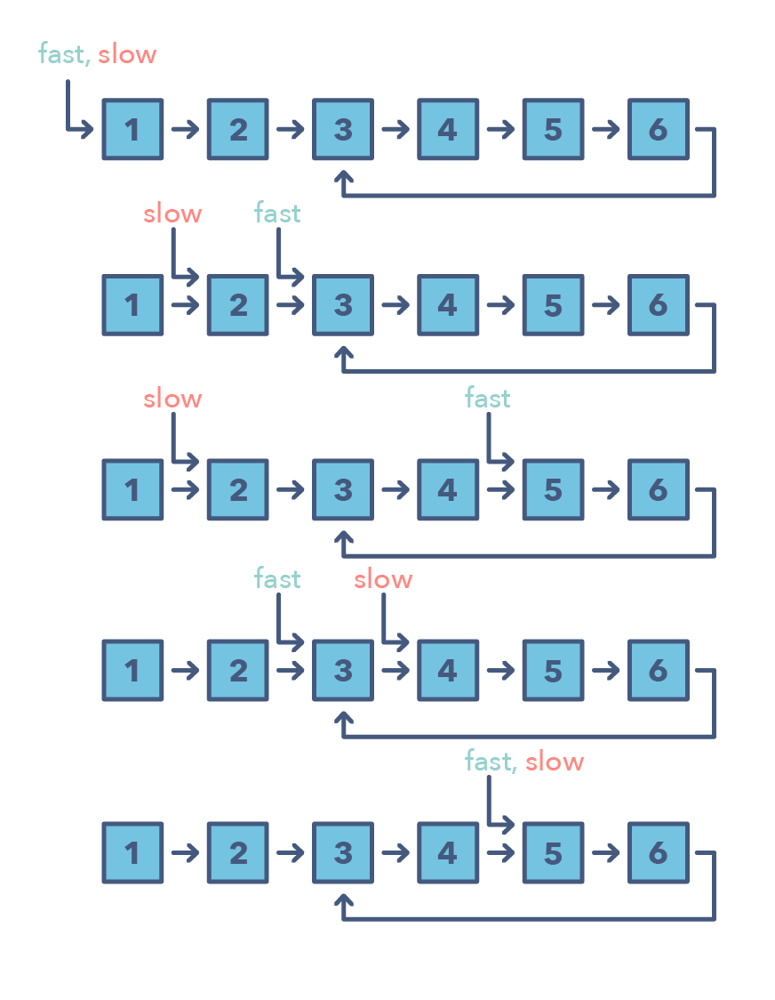

**How do you identify when to use the Fast and Slow pattern?**

- The problem will deal with a loop in a linked list or array
- When you need to know the position of a certain element or the overall length of the linked list.

**When should I use it over the Two Pointer method mentioned above?**

- There are some cases where you shouldn’t use the Two Pointer approach such as in a singly linked list where you can’t move in a backwards direction. An example of when to use the Fast and Slow pattern is when you’re trying to determine if a linked list is a palindrome.

**Problems featuring the fast and slow pointers pattern:**
- Linked List Cycle (easy)
- Palindrome Linked List (medium)
- Cycle in a Circular Array (hard)

In [3]:
class ListNode:
  def __init__(self, val):
    self.val = val
    self.next = None

In [4]:
class Solution:
  def hasCycle(self, head: ListNode) -> bool:
    slow, fast = head, head
    while fast is not None and fast.next is not None:
      fast = fast.next.next
      slow = slow.next
      if slow == fast:
        return True
    return False

#**4. Merge Intervals**

The Merge Intervals pattern is an efficient technique to deal with overlapping intervals. In a lot of problems involving intervals, you either need to find overlapping intervals or merge intervals if they overlap. 

The pattern works like this: Given two intervals ("a" and "b"), there will be six different ways the two intervals can relate to each other:

Understanding and recognizing these six cases will help you help you solve a wide range of problems from inserting intervals to optimizing interval merges.

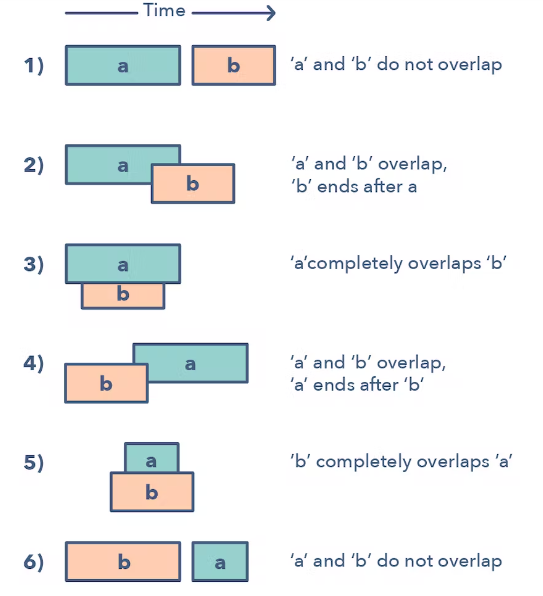

**How do you identify when to use the Merge Intervals pattern?**

- If you’re asked to produce a list with only mutually exclusive intervals
- If you hear the term “overlapping intervals”.

**Merge interval problem patterns:**

- Intervals Intersection (medium)
- Maximum CPU Load (hard)

**Example**: Given a set of time intervals in any order, merge all overlapping intervals into one and output the result which should have only mutually exclusive intervals.

**Strategy**: **Compare the last element of the first array with first element of the next array**. EX: For the given intervals `[1,3], [2,4]` compare `3` with `2` based on the comparision merge the interval of leave as it is.

In [5]:
def mergeInterval(intervals: List[List[int]]) -> List[List[int]]:
  
  if len(intervals) == 0:
      return []
  
  sorted_intervals = sorted(intervals, key = lambda x: x[0])
  
  res = [sorted_intervals[0]]
  
  for interval in sorted_intervals[1:]:
      #the next node's smallest value is smaller than the prev node's largest value, then overlapping
      if interval[0] <= res[-1][1]:
          #left boundary is the largest value
          res[-1][1] = max(interval[1], res[-1][1])
      else:
          res.append(interval)
  return res

# Given intervals: `[1,3], [2,4], [6,8], [9,10]` we have only two overlapping intervals
# here,`[1,3]` and `[2,4]`. Therefore we will merge these two and return 
# `[1,4], [6,8], [9,10]`.
intervals = [[1,3], [2,4], [6,8], [9,10]] 
mergeInterval(intervals)

[[1, 4], [6, 8], [9, 10]]

#**5. Cyclic Sort**

This pattern describes an interesting approach to deal with problems involving arrays containing numbers in a given range. **The Cyclic Sort pattern iterates over the array one number at a time, and if the current number you are iterating is not at the correct index, you swap it with the number at its correct index**. 

You could try placing the number in its correct index, but this will produce a complexity of O(n^2) which is not optimal, hence the Cyclic Sort pattern.

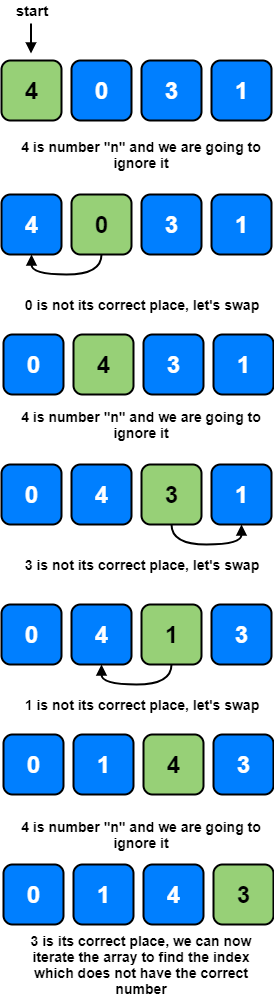

**How do I identify this pattern?**

- They will be problems involving a sorted array with numbers in a given range
- If the problem asks you to find the missing/duplicate/smallest number in an sorted/rotated array

**Problems featuring cyclic sort pattern:**

- Find the Missing Number (easy)
- Find the Smallest Missing Positive Number (medium)

**We are given an array, we need to sort it using the concept of cycle sort. It is an in-place algorithm and swapping takes place by the formation of cycles.**

**Example**: Given an array containing n distinct numbers taken from `0, 1, 2, …, n` find the one that is missing from the array.

In [6]:
def missingNumber(nums: List[int]) -> int:
  start = 0

  while start < len(nums):
      num = nums[start]
      if num < len(nums) and num != start:
          nums[start], nums[num] = nums[num], nums[start]
      else:
          start += 1

  for i in range(len(nums)):
      if nums[i] != i:
          return i

  return len(nums)

nums = [3, 0, 1]  
print(missingNumber(nums))

nums = [9, 6, 4, 2, 3, 5, 7, 0, 1]  
print(missingNumber(nums))

2
8


#**6. In-place reversal of Linked List**

In a lot of problems, you may be asked to reverse the links between a set of nodes of a linked list. Often, the constraint is that you need to do this in-place, i.e., using the existing node objects and without using extra memory. This is where the above mentioned pattern is useful.

This pattern **reverses one node at a time starting with one variable (current) pointing to the head of the linked list, and one variable (previous) will point to the previous node that you have processed**. In a lock-step manner, you will reverse the current node by pointing it to the previous before moving on to the next node. Also, you will update the variable “previous” to always point to the previous node that you have processed.

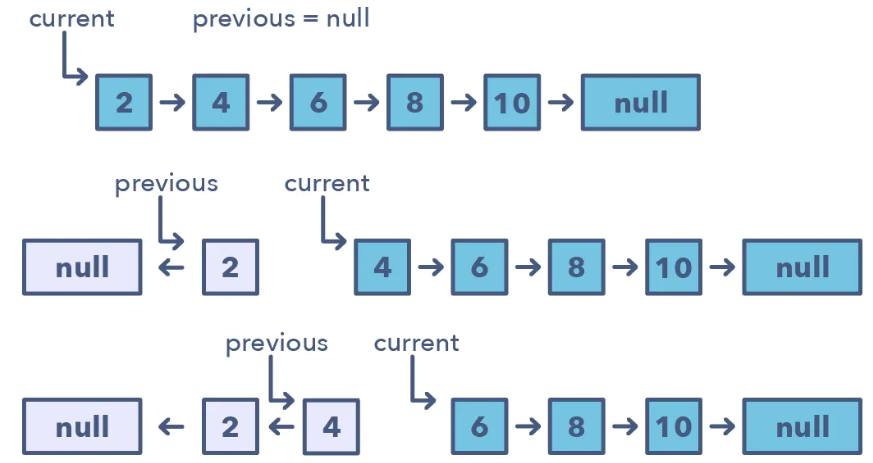

**How do I identify when to use this pattern:**

- If you’re asked to reverse a linked list without using extra memory

**Problems featuring in-place reversal of linked list pattern:**

- Reverse a Sub-list (medium)
- Reverse every K-element Sub-list (medium)

In [7]:
from typing import Optional
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
      prev, curr = None, head
      while curr:
        nxt = curr.next
        curr.next = prev
        prev = curr
        curr = nxt
      return prev

#**7. Tree Breadth First Search**

This pattern is based on the **Breadth First Search (BFS)** technique to traverse a tree and uses a queue to keep track of all the nodes of a level before jumping onto the next level. Any problem involving the traversal of a tree in a level-by-level order can be efficiently solved using this approach.

The Tree Breadth First Search (BFS) pattern works by **pushing the root node to the queue and then continually iterating until the queue is empty**. For each iteration, we remove the node at the head of the queue and “visit” that node. After removing each node from the queue, we also insert all of its children into the queue.

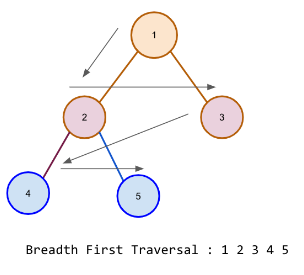

**How to identify the Tree BFS pattern:**

- If you’re asked to traverse a tree in a level-by-level fashion (or level order traversal)

**Problems featuring Tree BFS pattern:**

- Binary Tree Level Order Traversal (easy)
- Zigzag Traversal (medium)

In [8]:
def bfs(data, node): #function for BFS
  
  visited, queue = [], []

  visited.append(node)
  queue.append(node)

  while queue:          # Creating loop to visit each node
    m = queue.pop(0) 
    print (m, end = " ") 

    for neighbour in data[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)

data = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}
bfs(data, '5')    

5 3 7 2 4 8 

#**8. Tree Depth First Search**

Tree Depth First Search is based on the Depth First Search (DFS) technique to traverse a tree.

You can use recursion (or a stack for the iterative approach) to keep track of all the previous (parent) nodes while traversing.

The Tree Depth First Search pattern works by starting at the root of the tree, if the node is not a leaf you need to do three things:

- Decide whether to process the current node now (pre-order), or between processing two children (in-order) or after processing both children (post-order).
- Make two recursive calls for both the children of the current node to process them.

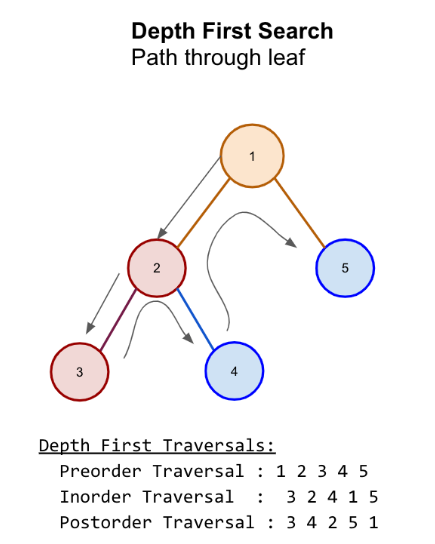

**How to identify the Tree Depth First Search pattern:**

- If you’re asked to traverse a tree with in-order, preorder, or postorder DFS
- If the problem requires searching for something where the node is closer to a leaf

**Problems featuring Tree Depth First Search pattern:**
- Sum of Path Numbers (medium)
- All Paths for a Sum (medium)

In [9]:
#function for dfs 
def dfs(graph, node):  
  visited = []
  if node not in visited:
      print (node)
      visited.append(node)
      for neighbour in graph[node]:
          dfs(graph, neighbour)
  return 
 
# sample data in dictionary form
# sample data in dictionary form
data = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

dfs(data, '5')

5
3
2
4
8
7
8


#**9. Two Heaps**

A binary heap is a special data structure that resembles a binary tree. **It differs in the sense that the root of any subtree should be the smallest or the largest element.**

Heaps are complete binary trees. Complete binary trees satisfy the following conditions:

- All levels are filled, except the last.
- All the nodes are as far left as possible.

In many problems, we are given a set of elements such that we can divide them into two parts. To solve the problem, **we are interested in knowing the smallest element in one part and the biggest element in the other part**. This pattern is an efficient approach to solve such problems.

This pattern uses two heaps; **A Min Heap to find the smallest element and a Max Heap to find the biggest element. The pattern works by storing the first half of numbers in a Max Heap, this is because you want to find the largest number in the first half. You then store the second half of numbers in a Min Heap, as you want to find the smallest number in the second half**. At any time, the median of the current list of numbers can be calculated from the top element of the two heaps.

As we can notice below - 
- Max Heap: Parent node is greater than child nodes
- Min Heap: Parent node is smaller than child nodes

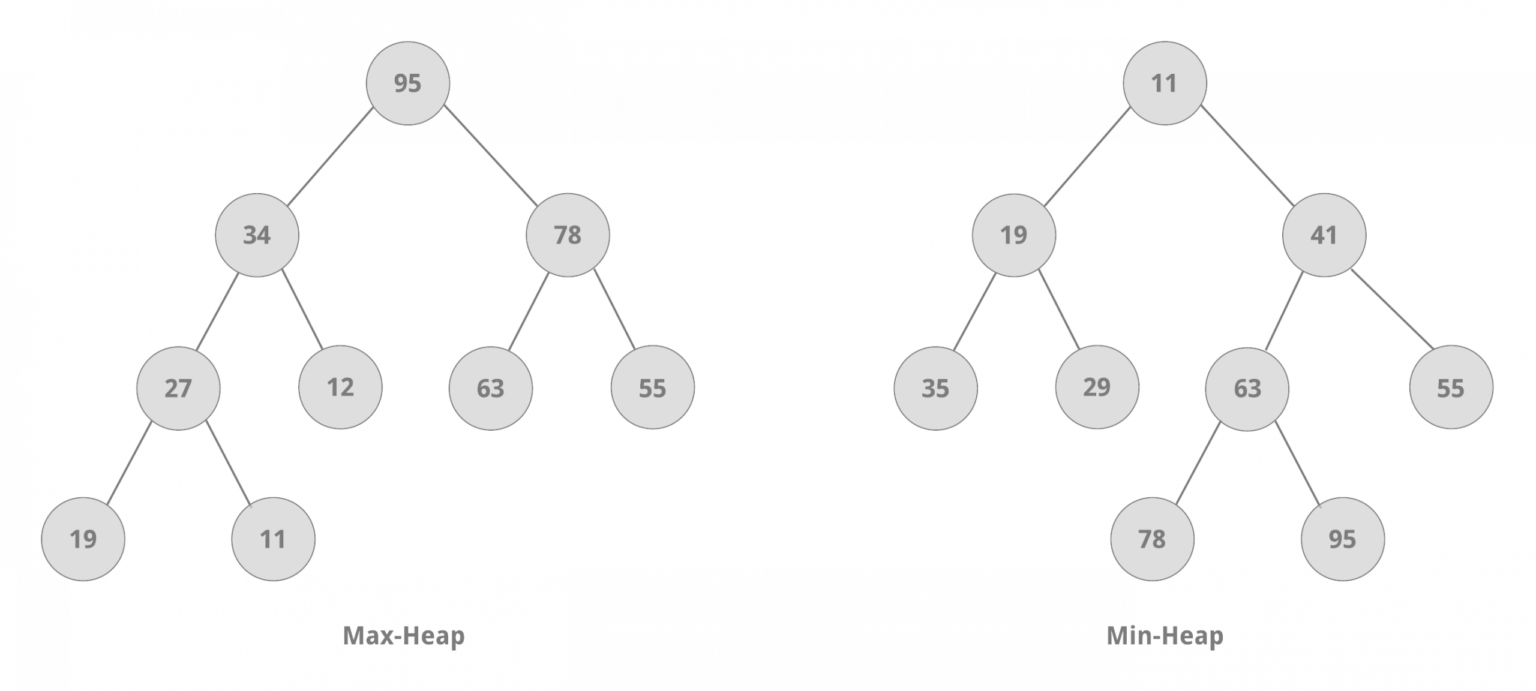

**Ways to identify the Two Heaps pattern:**

- Useful in situations like Priority Queue, Scheduling
- If the problem states that you need to find the smallest/largest/median elements of a set
- Sometimes, useful in problems featuring a binary tree data structure

**Problems featuring**

- Find the Median of a Number Stream (medium)

In [10]:
class MaxHeap:
  def __init__(self):
      # Initialize a heap using list
      self.heap = []

  def getParentPosition(self, i):
      # The parent is located at floor((i-1)/2)
      return int((i-1)/2)

  def getLeftChildPosition(self, i):
      # The left child is located at 2 * i + 1
      return 2*i+1

  def getRightChildPosition(self, i):
      # The right child is located at 2 * i + 2
      return 2*i+2

  def hasParent(self, i):
      # This function checks if the given node has a parent or not
      return self.getParentPosition(i) < len(self.heap)

  def hasLeftChild(self, i):
      # This function checks if the given node has a left child or not
      return self.getLeftChildPosition(i) < len(self.heap)

  def hasRightChild(self, i):
      # This function checks if the given node has a right child or not
      return self.getRightChildPosition(i) < len(self.heap)

  def insert(self, key):
      self.heap.append(key) # Adds the key to the end of the list
      self.heapify(len(self.heap) - 1) # Re-arranges the heap to maintain the heap property

  def getMax(self):
      return self.heap[0] # Returns the largest value in the heap in O(1) time.

  def heapify(self, i):
      while(self.hasParent(i) and self.heap[i] > self.heap[self.getParentPosition(i)]): # Loops until it reaches a leaf node
          self.heap[i], self.heap[self.getParentPosition(i)] = self.heap[self.getParentPosition(i)], self.heap[i] # Swap the values
          i = self.getParentPosition(i) # Resets the new position

  def printHeap(self):
      print(self.heap) # Prints the heap

In [11]:
import heapq
class MinHeap:
  def __init__(self, minheap): # minheap is the list that we can to convert to a heap
      heapq.heapify(minheap) # Use the heapify function to convert list to a heap
      self.minheap = minheap

  def insert(self, key):
      heapq.heappush(self.minheap, key) # Insert key into the heap (heapq automatically maintains the heap property)

  def getMin(self):
      return self.minheap[0] # Returns the smallest element of the heap in O(1) time

  def removeMin(self):
      heapq.heappop(self.minheap) # The heappop function removes the smallest element in the heap

  def printHeap(self):
      print(self.minheap) # Prints the heap

#**10. Subsets**

A huge number of coding interview problems involve dealing with **Permutations** and **Combinations** of a given set of elements. **The pattern Subsets describes an efficient Breadth First Search (BFS) approach to handle all these problems.**

The pattern looks like this:

Given a set of [1, 5, 3]

- Start with an empty set: [[]]
- Add the first number (1) to all the existing subsets to create new subsets: `[[], [1]]`
- Add the second number (5) to all the existing subsets: `[[], [1], [5], [1,5]]`
- Add the third number (3) to all the existing subsets: `[[], [1], [5], [1,5], [3], [1,3], [5,3], [1,5,3]]`

Here is a visual representation of the Subsets pattern:

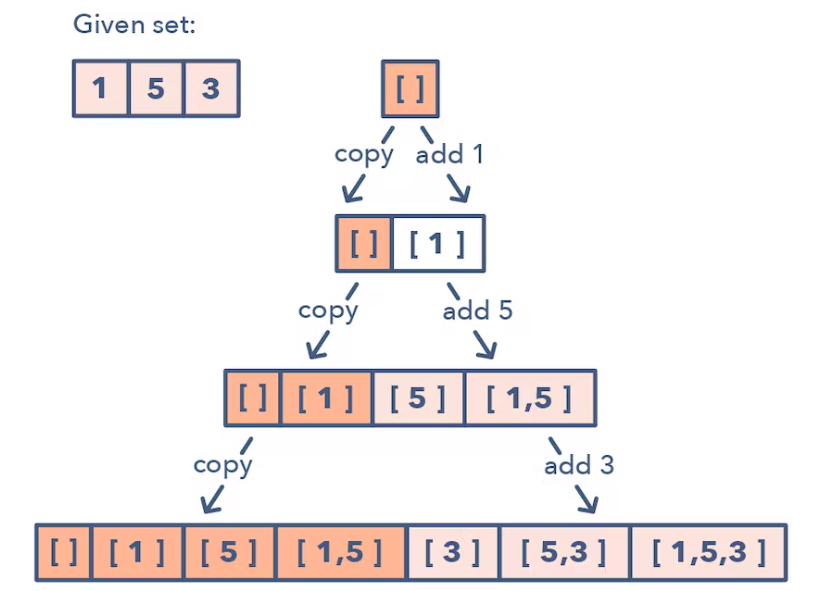

**How to identify the Subsets pattern:**

- Problems where you need to find the combinations or permutations of a given set

**Problems featuring Subsets pattern:**

- Subsets With Duplicates (easy)
- String Permutations by changing case (medium)

In [12]:
from typing import Optional
def subsets(numbers: List[int]):
    if numbers == []:
        return [[]]
    x = subsets(numbers[1:])    
    return x + [[numbers[0]] + y for y in x]

def subsets_of_given_size(numbers: List[int], n: Optional[int]):
    return [x for x in subsets(numbers) if len(x)==n]

numbers = [1, 2, 3, 4]
print(subsets(numbers))

numbers = [1, 2, 3, 4]
print(subsets_of_given_size(numbers, 3))

[[], [4], [3], [3, 4], [2], [2, 4], [2, 3], [2, 3, 4], [1], [1, 4], [1, 3], [1, 3, 4], [1, 2], [1, 2, 4], [1, 2, 3], [1, 2, 3, 4]]
[[2, 3, 4], [1, 3, 4], [1, 2, 4], [1, 2, 3]]


#**11. Binary Search**

**Whenever you are given a sorted array, linked list, or matrix, and are asked to find a certain element, the best algorithm you can use is the Binary Search.**This pattern describes an efficient way to handle all problems involving Binary Search.

The patterns looks like this for an ascending order set:

- First, find the middle of start and end. An easy way to find the middle would be: `middle = (start + end) / 2`. But this has a good chance of producing an integer overflow so it’s recommended that you represent the middle as: `middle = start + (end — start) / 2`
- If the key is equal to the number at index middle then return middle
- If `key` isn’t equal to the index middle:
- Check if `key < arr[middle]`. If it is reduce your search to `end = middle — 1`
- Check if `key > arr[middle]`. If it is reduce your search to `end = middle + 1`

Here is a visual representation of the **Modified Binary Search** pattern:

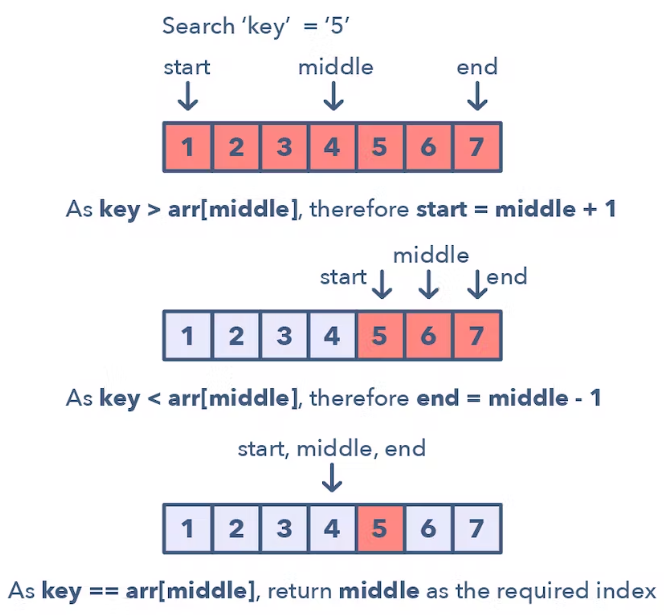

**Problems featuring the Modified Binary Search pattern:**

- Order-agnostic Binary Search (easy)
- Search in a Sorted Infinite Array (medium)

In [13]:
def binary_search(numbers_list, number_to_find):
  left_index = 0
  right_index = len(numbers_list) - 1
  mid_index = 0

  while left_index <= right_index:
    mid_index = (left_index + right_index) // 2
    mid_number = numbers_list[mid_index]

    if mid_number == number_to_find:
        return mid_index

    if mid_number < number_to_find:
        left_index = mid_index + 1
    else:
        right_index = mid_index - 1

  return -1

numbers_list = [0,1,2,4,5,6,7]  
number_to_find = 6
print("Index of the number : ", binary_search(numbers_list, number_to_find))

Index of the number :  5


#**12. Top K Elements**

**Any problem that asks us to find the top/smallest/frequent ‘K’ elements among a given set falls under this pattern.**

The best data structure to keep track of `K` elements is Heap. This pattern will make use of the Heap to solve multiple problems dealing with `K` elements at a time from a set of given elements. The pattern looks like this:

- Insert `K` elements into the min-heap or max-heap based on the problem.
- Iterate through the remaining numbers and if you find one that is larger than what you have in the heap, then remove that number and insert the larger one.

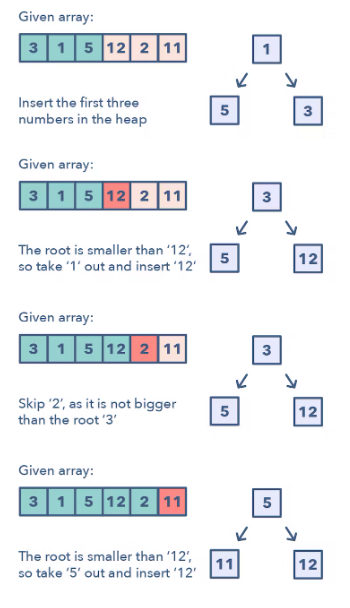

There is no need for a sorting algorithm because the heap will keep track of the elements for you.

**How to identify the Top `K` Elements pattern:**

- If you’re asked to find the top/smallest/frequent `K` elements of a given set
- If you’re asked to sort an array to find an exact element

**Problems featuring Top `K` Elements pattern:**

- Top `K` Numbers (easy)
- Top `K` Frequent Numbers (medium)

**The pattern looks like this:**

- Insert the first element of each array in a Min Heap.
- After this, take out the smallest (top) element from the heap and add it to the merged list.
- After removing the smallest element from the heap, insert the next element of the same list into the heap.
- Repeat steps 2 and 3 to populate the merged list in sorted order.

**How to identify the K-way Merge pattern:**

- The problem will feature sorted arrays, lists, or a matrix
- If the problem asks you to merge sorted lists, find the smallest element in a sorted list.

**Problems featuring the K-way Merge pattern:**

- Merge K Sorted Lists (medium)
- K Pairs with Largest Sums (Hard)

In [14]:
def topKFrequent(nums, k):
  number_frequency = {}
  frequency_list ={}
  for i in nums:
      if i not in number_frequency:
        number_frequency[i] = 1
      else:
        number_frequency[i] += 1
  for key,value in number_frequency.items():
      if value not in frequency_list:
        frequency_list[value] = [key]
      else:
        frequency_list[value].append(key)
  result = []
  for i in range(len(nums),0,-1):
      if i in frequency_list:
        result.extend(frequency_list[i])
      if len(result) >=k:
        break
  return result

print(topKFrequent([1,1,1,1,2,2,3,3,3], 2))

[1, 3]


#**13. K-Way Merge**

K-way Merge helps you solve **problems that involve a set of sorted arrays**.

**Whenever you’re given `K` sorted arrays, you can use a Heap to efficiently perform a sorted traversal of all the elements of all arrays**. You can push the smallest element of each array in a Min Heap to get the overall minimum. After getting the overall minimum, push the next element from the same array to the heap. Then, repeat this process to make a sorted traversal of all elements.

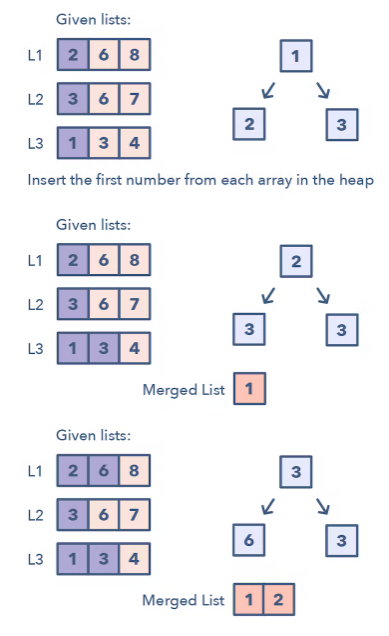

**The pattern looks like this:**

- Insert the first element of each array in a Min Heap.
- After this, take out the smallest (top) element from the heap and add it to the merged list.
- After removing the smallest element from the heap, insert the next element of the same list into the heap.
- Repeat steps 2 and 3 to populate the merged list in sorted order.

**How to identify the K-way Merge pattern:**

- The problem will feature sorted arrays, lists, or a matrix
- If the problem asks you to merge sorted lists, find the smallest element in a sorted list.

**Problems featuring the K-way Merge pattern:**

- Merge K Sorted Lists (medium)
- K Pairs with Largest Sums (Hard)

In [15]:
def kWayMerge(lists):
  final_list = []
  heap = [(mylst[0], i, 0) for i, mylst in enumerate(lists) if mylst]
  heapq.heapify(heap)

  while heap:
      val, list_ind, element_ind = heapq.heappop(heap)
      final_list.append(val)
      if element_ind + 1 < len(lists[list_ind]):
          next_tuple = (lists[list_ind][element_ind + 1],
                        list_ind,
                        element_ind + 1)
          heapq.heappush(heap, next_tuple)
  return final_list

lists = [[10,40,70],[20,50,80],[30,60,90]]
print(kWayMerge(lists))

lists = [[],[],[]]
print(kWayMerge(lists))

lists = [[1],[2],[]]
print(kWayMerge(lists))

lists = [[1],[2,4],[3,5]]
print(kWayMerge(lists))

lists = [[1,13,27,45],[2],[3,5,11,14,17,19,22]]
print(kWayMerge(lists))

[10, 20, 30, 40, 50, 60, 70, 80, 90]
[]
[1, 2]
[1, 2, 3, 4, 5]
[1, 2, 3, 5, 11, 13, 14, 17, 19, 22, 27, 45]


#**14. Topological Sort**

Topological Sort is used to find a linear ordering of elements that have dependencies on each other. For example, if event `B` is dependent on event `A`, `A` comes before `B` in topological ordering.

This pattern defines an easy way to understand the technique for performing topological sorting of a set of elements.

The pattern works like this:

- Initialization
 - a) Store the graph in adjacency lists by using a HashMap
 - b) To find all sources, use a HashMap to keep the count of in-degreesBuild the graph and find in-degrees of all vertices
- Build the graph from the input and populate the in-degrees HashMap.
- Find all sources
 - a) All vertices with ‘0’ in-degrees will be sources and are stored in a Queue.
- Sort
 - a) For each source, do the following things:
  - i) Add it to the sorted list.
  - ii)Get all of its children from the graph.
  - iii)Decrement the in-degree of each child by 1.
  - iv)If a child’s in-degree becomes ‘0’, add it to the sources Queue.
 - b) Repeat (a), until the source Queue is empty.

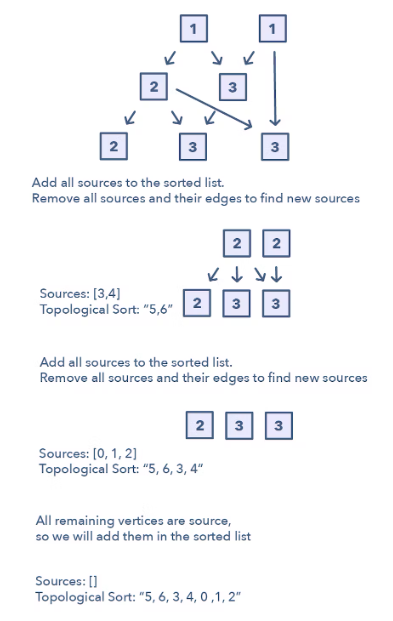

**How to identify the Topological Sort pattern:**

- The problem will deal with graphs that have no directed cycles
- If you’re asked to update all objects in a sorted order
- If you have a class of objects that follow a particular order

**Problems featuring the Topological Sort pattern:**

- Task scheduling (medium)
- Minimum height of a tree (hard)

In [16]:
#Python program to print topological sorting of a DAG
from collections import defaultdict
 
#Class to represent a graph
class Graph:
  def __init__(self,vertices):
      self.graph = defaultdict(list) #dictionary containing adjacency List
      self.V = vertices #No. of vertices

  # function to add an edge to graph
  def addEdge(self,u,v):
      self.graph[u].append(v)

  # A recursive function used by topologicalSort
  def topologicalSortUtil(self,v,visited,stack):

      # Mark the current node as visited.
      visited[v] = True

      # Recur for all the vertices adjacent to this vertex
      for i in self.graph[v]:
          if visited[i] == False:
              self.topologicalSortUtil(i,visited,stack)

      # Push current vertex to stack which stores result
      stack.insert(0,v)    
    # The function to do Topological Sort. It uses recursive
    # topologicalSortUtil()
  def topologicalSort(self):
      # Mark all the vertices as not visited
      visited = [False]*self.V
      stack =[]

      # Call the recursive helper function to store Topological
      # Sort starting from all vertices one by one
      for i in range(self.V):
          if visited[i] == False:
              self.topologicalSortUtil(i,visited,stack)

      # Print contents of stack
      print (stack)      

In [17]:
g = Graph(6)
g.addEdge(5, 2);
g.addEdge(5, 0);
g.addEdge(4, 0);
g.addEdge(4, 1);
g.addEdge(2, 3);
g.addEdge(3, 1);
 
print ("Following is a Topological Sort of the given graph")
g.topologicalSort()

Following is a Topological Sort of the given graph
[5, 4, 2, 3, 1, 0]
